## Introduction

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.
Requirement is to build a multiple linear regression model for the prediction of demand for shared bikes. 

### The company wants to know:
##### -- Which variables are significant in predicting the demand for shared bikes.
##### -- How well those variables describe the bike demands


## Business Goal 

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Preparation & EDA

In [3]:
# reading data
data=pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#understanding data
data.shape

(730, 16)

In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#checking for null values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Dropping columns

In [8]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
data.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

#### Removing columns:
1. 'instant' as it only represents the numerical indexing.
2. 'dteday' as there are cols for year & month there is less requirement.

In [10]:
new_data = data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [11]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [12]:
#converting numerical season values
def convert_season(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [13]:
new_data[['season']]=new_data[['season']].apply(convert_season)
new_data.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [14]:
#converting numerircal month values
def convert_month(x):
    return x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [15]:
new_data[['mnth']]=new_data[['mnth']].apply(convert_month)
new_data.mnth.value_counts()

dec    62
jul    62
aug    62
mar    62
oct    62
may    62
jan    62
jun    60
nov    60
apr    60
sep    60
feb    56
Name: mnth, dtype: int64

In [16]:
#converting numerircal week values
def convert_week(x):
    return x.map({0:'sun', 1:'mon', 2:'tues',3:'wed', 4:'thurs', 5:'fri', 6:'sat'})

In [17]:
new_data[['weekday']]=new_data[['weekday']].apply(convert_week)
new_data.weekday.value_counts()

tues     105
mon      105
thurs    104
sat      104
fri      104
wed      104
sun      104
Name: weekday, dtype: int64

In [18]:
#converting numerircal weather values
def convert_weather(x):
    return x.map ({1:'clear', 2:'mist', 3:'snow', 4:'rainy'})

In [19]:
new_data[['weathersit']]=new_data[['weathersit']].apply(convert_weather)
new_data.weathersit.value_counts()

clear    463
mist     246
snow      21
Name: weathersit, dtype: int64

### Visualising numerical & catagorical data

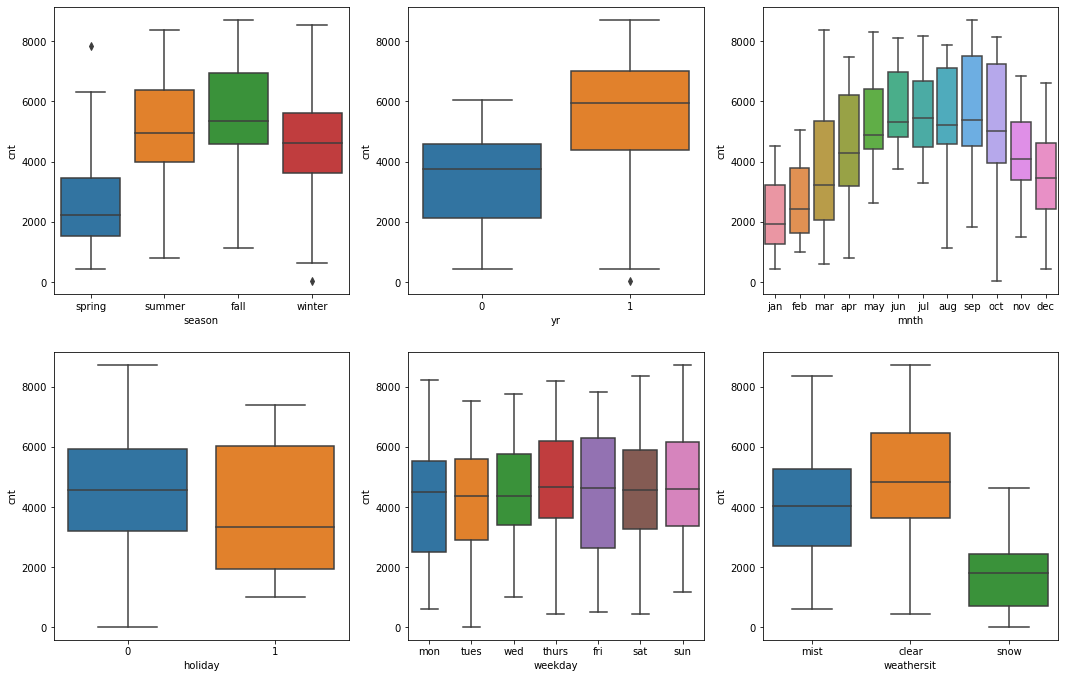

In [20]:
# checking distribution of categorical variables
plt.figure(figsize=(18,18))
plt.subplot(331)
sns.boxplot(x='season', y='cnt',data=new_data)
plt.subplot(332)
sns.boxplot(x='yr', y='cnt',data=new_data)
plt.subplot(333)
sns.boxplot(x='mnth', y='cnt',data=new_data)
plt.subplot(334)
sns.boxplot(x='holiday', y='cnt',data=new_data)
plt.subplot(335)
sns.boxplot(x='weekday', y='cnt',data=new_data)
plt.subplot(336)
sns.boxplot(x='weathersit', y='cnt',data=new_data)
plt.show()

#### Keynotes & observations:
1. In first graph, it is observed that fall season have the highest demand count whereas spring season having the lowest.
2. As compared to 2018, there were more sales showcasing the high demand for bikes.
3. From third graph, it can clearly observed that from may there is hike in demand which falls in summer & fall and mostly schools and colleges are closed during that time.
4. For weather graph there is decrease in demand when it snows.

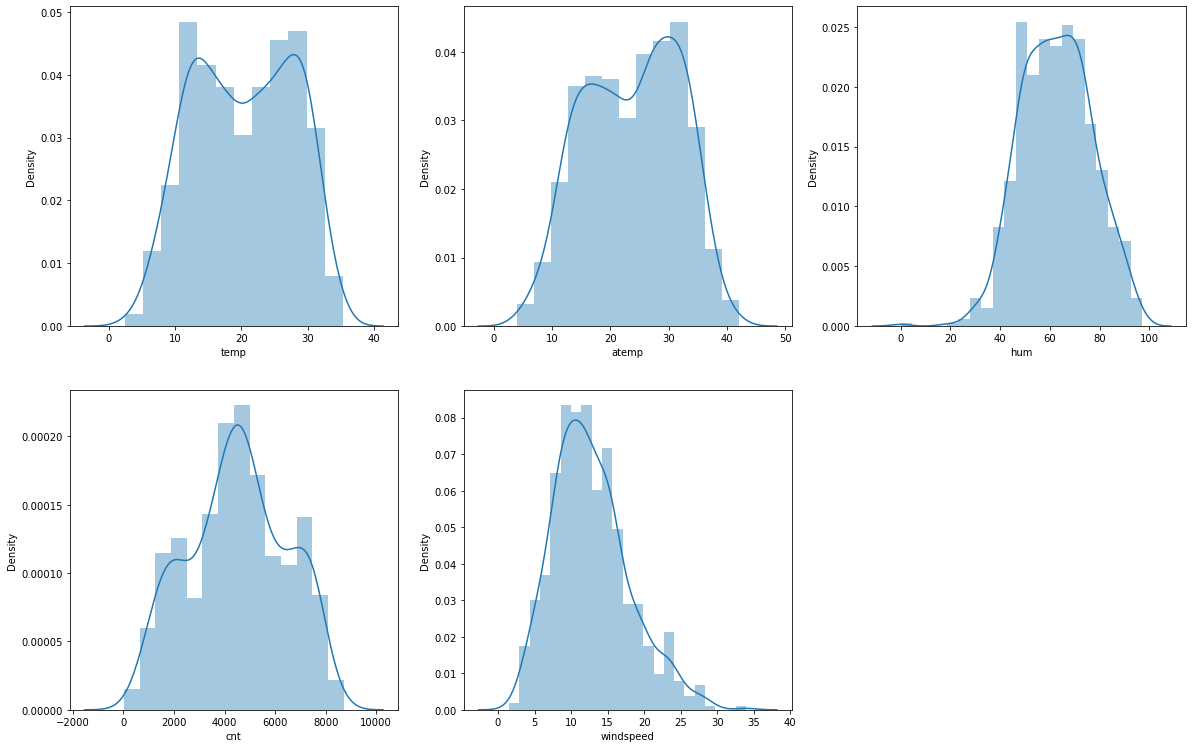

In [21]:
# checking for numerical variables density of values
plt.figure(figsize=(20,20))
plt.subplot(331)
sns.distplot(new_data['temp'])
plt.subplot(332)
sns.distplot(new_data['atemp'])
plt.subplot(333)
sns.distplot(new_data['hum'])
plt.subplot(334)
sns.distplot(new_data['cnt'])
plt.subplot(335)
sns.distplot(new_data['windspeed'])
plt.show()

#### Drawing Correlation heatmap for better understanding collinearity between all variables

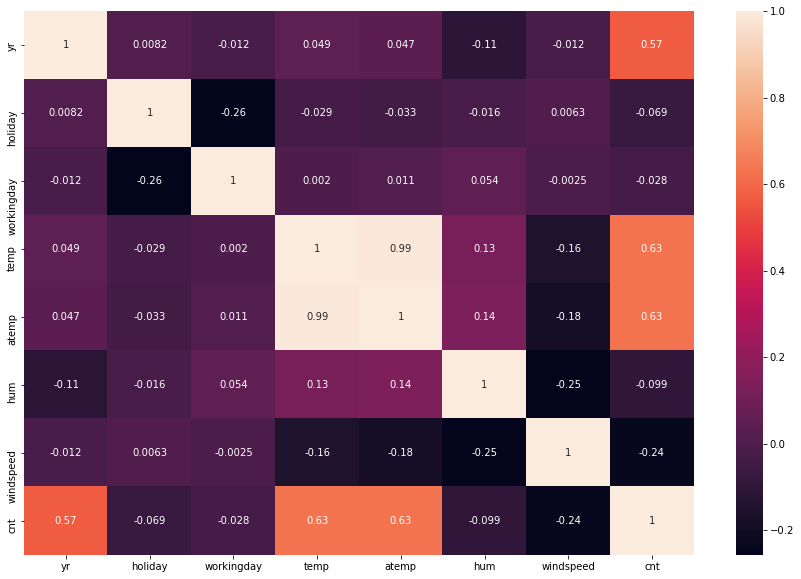

In [22]:
plt.figure(figsize = (15,10))
sns.heatmap(new_data.corr(), annot = True)
plt.show()

### As it is observed that temp & atemp are highly coorelated we will drop atemp

In [23]:
new_data.drop('atemp',axis=1, inplace=True)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


### Creating dummies for categorial variables

In [24]:
new_data = pd.get_dummies(new_data, drop_first=True)
new_data.shape

(730, 29)

### Next splitting data into train & test sets

In [25]:
data_train , data_test = train_test_split(new_data, train_size=0.7, random_state=100)

In [26]:
data_train.shape

(510, 29)

In [27]:
data_test.shape

(220, 29)

### Rescaling of the some variables using MinMaxScaler

In [28]:
scaler= MinMaxScaler()
num_var=['temp','hum','windspeed','cnt']
data_train[num_var]=scaler.fit_transform(data_train[num_var])
data_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_mist,weathersit_snow
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [29]:
data_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_mist,weathersit_snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing model

In [30]:
y_train= data_train.pop('cnt')
X_train=data_train

#### Using RFE and building model

In [31]:
# required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

rfe = RFE(model, 15)
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 9),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 11),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 8),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 7),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thurs', False, 13),
 ('weekday_tues', False, 6),
 ('weekday_wed', False, 10),
 ('weathersit_mist', True, 1),
 ('weathersit_snow', True, 1)]

In [34]:
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sep', 'weathersit_mist', 'weathersit_snow'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_aug', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thurs', 'weekday_tues', 'weekday_wed'],
      dtype='object')

In [36]:
# with RFE selected variables 
X_train_rfe = X_train[cols]
m = sm.OLS(y_train,X_train_rfe).fit()

### Now building model using Stats model for better details

In [37]:
# importing library to check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
# Creating new dataframe for containing names of all the feature variables and their VIF value
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.82
13,weathersit_mist,2.32
0,yr,2.09
11,mnth_nov,1.85
9,mnth_jan,1.75


In [39]:
# Adding a constant
X_train_m1 = sm.add_constant(X_train_rfe)

# fitting model
m = sm.OLS(y_train, X_train_m1).fit()

In [40]:
m.params

const              0.319667
yr                 0.230404
holiday           -0.091089
temp               0.481503
hum               -0.162213
windspeed         -0.188726
season_spring     -0.061255
season_summer      0.042337
season_winter      0.101921
mnth_dec          -0.035461
mnth_jan          -0.043411
mnth_jul          -0.055250
mnth_nov          -0.038701
mnth_sep           0.075467
weathersit_mist   -0.054300
weathersit_snow   -0.246481
dtype: float64

In [41]:
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          8.15e-189
Time:                        20:47:43   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3197      0.036     

In [42]:
# calculating vif
vif = pd.DataFrame()
X = X_train_m1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.52
6,season_spring,5.27
3,temp,4.42
8,season_winter,3.83
7,season_summer,2.77
4,hum,1.92
12,mnth_nov,1.77
10,mnth_jan,1.68
14,weathersit_mist,1.57
9,mnth_dec,1.50


#### Due to high VIF of const variable we will create another model

In [43]:
X_train_m2 = X_train_m1.drop(["const"], axis = 1)

# fitting model
m = sm.OLS(y_train, X_train_m2).fit()

In [44]:
# calculating vif of model 2
vif = pd.DataFrame()
X = X_train_m2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.82
13,weathersit_mist,2.32
0,yr,2.09
11,mnth_nov,1.85
9,mnth_jan,1.75


#### Due to high VIF of hum variable we will drop it to check

In [45]:
X_train_m3 = X_train_m2.drop(["hum"], axis = 1)

# fitting model
m = sm.OLS(y_train, X_train_m3).fit()

In [46]:
# calculating vif of model 3
vif = pd.DataFrame()
X = X_train_m3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.95
4,season_spring,2.89
5,season_summer,2.24
0,yr,2.07
10,mnth_nov,1.81
8,mnth_jan,1.66
9,mnth_jul,1.59
12,weathersit_mist,1.57


In [47]:
print(m.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1196.
Date:                Thu, 10 Mar 2022   Prob (F-statistic):                        0.00
Time:                        20:47:43   Log-Likelihood:                          476.59
No. Observations:                 510   AIC:                                     -925.2
Df Residuals:                     496   BIC:                                     -865.9
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

#### As we cannot drop temp variable because it is important we will drop windspeed and check again

In [48]:
X_train_m4 = X_train_m3.drop(["windspeed"], axis = 1)

# fitting model
m = sm.OLS(y_train, X_train_m4).fit()

In [49]:
# calculating vif of model 4
vif = pd.DataFrame()
X = X_train_m4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.30
5,season_winter,2.81
3,season_spring,2.12
0,yr,2.07
4,season_summer,1.94
9,mnth_nov,1.79
7,mnth_jan,1.65
8,mnth_jul,1.59
11,weathersit_mist,1.56
6,mnth_dec,1.47


In [50]:
print(m.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1250.
Date:                Thu, 10 Mar 2022   Prob (F-statistic):                        0.00
Time:                        20:47:43   Log-Likelihood:                          468.73
No. Observations:                 510   AIC:                                     -911.5
Df Residuals:                     497   BIC:                                     -856.4
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

### Now that VIF is less than 5 we will remove columns will high P values

In [51]:
X_train_m5 = X_train_m4.drop(['mnth_dec','mnth_jan','mnth_nov','mnth_jul','season_spring'], axis = 1)

# fitting model
m = sm.OLS(y_train, X_train_m5).fit()

In [52]:
# calculating vif of model 5
vif = pd.DataFrame()
X = X_train_m5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.85
0,yr,1.94
3,season_summer,1.52
6,weathersit_mist,1.44
4,season_winter,1.34
5,mnth_sep,1.19
7,weathersit_snow,1.06
1,holiday,1.03


In [53]:
print(m.summary())

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              2002.
Date:                Thu, 10 Mar 2022   Prob (F-statistic):                        0.00
Time:                        20:47:43   Log-Likelihood:                          462.62
No. Observations:                 510   AIC:                                     -909.2
Df Residuals:                     502   BIC:                                     -875.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [54]:
m.params

yr                 0.241415
holiday           -0.087021
temp               0.647189
season_summer      0.091454
season_winter      0.156133
mnth_sep           0.102877
weathersit_mist   -0.063659
weathersit_snow   -0.285536
dtype: float64

#### There seems to be LOW Multicollinearity between the predictors and the p-values thus we can move further

### Making assumptions

In [55]:
y_train_pred = m.predict(X_train_m5)

Text(0.5, 0, 'Errors')

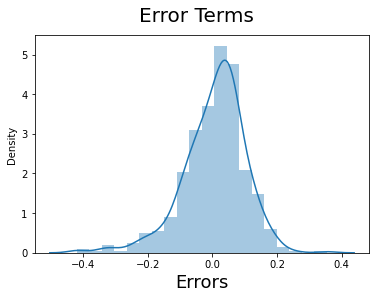

In [56]:
diff = y_train - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((diff), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)                         

#### From the graph we can conclude that residuals are normally distributed

In [57]:
m.params

yr                 0.241415
holiday           -0.087021
temp               0.647189
season_summer      0.091454
season_winter      0.156133
mnth_sep           0.102877
weathersit_mist   -0.063659
weathersit_snow   -0.285536
dtype: float64

In [58]:
# scaling test data
# scaler= MinMaxScaler()
# num_var=['temp','hum','windspeed','cnt']
data_test[num_var]=scaler.fit_transform(data_test[num_var])
data_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_mist,weathersit_snow
184,0,1,0,0.837241,0.534223,0.149393,0.704300,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.911423,0.470417,0.231142,0.725421,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496221,0.777843,0.443398,0.278853,0,0,1,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.890387,0.236659,0.449707,0.545512,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.070765,0.682387,0.569148,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [59]:
# setting y_test and x_test 
y_test = data_test.pop('cnt')
X_test = data_test

In [60]:
#Adding variables we finalized in the last model
col1=X_train_m5.columns
X_test=X_test[col1]

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               220 non-null    int64  
 1   holiday          220 non-null    int64  
 2   temp             220 non-null    float64
 3   season_summer    220 non-null    uint8  
 4   season_winter    220 non-null    uint8  
 5   mnth_sep         220 non-null    uint8  
 6   weathersit_mist  220 non-null    uint8  
 7   weathersit_snow  220 non-null    uint8  
dtypes: float64(1), int64(2), uint8(5)
memory usage: 7.9 KB


In [61]:
# predicting y_testpred
y_testpred = m.predict(X_test)

In [62]:
# calculating the accuracy of the y_test
r2_score = metrics.r2_score(y_test,y_testpred)
print(r2_score)

0.793560914478004


Text(0, 0.5, 'y_testpred')

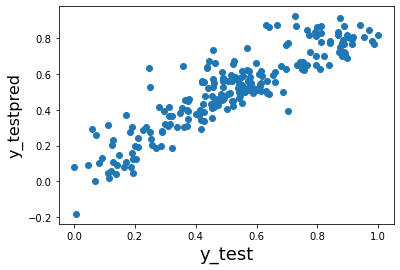

In [63]:
# graph for y_test and y_testpred 
fig = plt.figure()
plt.scatter(y_test, y_testpred)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_testpred', fontsize = 16)